数据来源：哥伦比亚海岸大学发布的肥胖水平估计数据集https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

数据加载

In [1]:
import pandas as pd 

# 数据文件读取
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv',encoding='gb18030', engine = 'python')
print('The shape is: ',data.shape)
data.head()

The shape is:  (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
#删除类别标签
data = data.iloc[:, :-1]
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


数据预处理

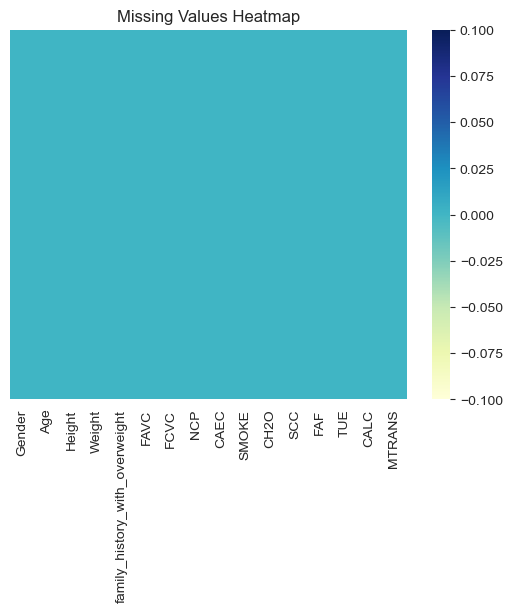

缺失值数量:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64


In [3]:
#缺失值处理

#绘制热图，可视化数据集中的缺失值。
#若为缺失值，则为True，颜色为深蓝色。
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(), cmap="YlGnBu", cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# 查看缺失值数量
missing_values = data.isnull().sum()
print("缺失值数量:\n", missing_values)
#不存在缺失值

In [4]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
#离群点检测

# 创建一个函数检测和去除离群点
def remove_outliers_iqr_adjusted(df, columns, iqr_multiplier):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # 调整的离群点阈值
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # 去除离群点
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
#使用四分位数（Q1 和 Q3）计算四分位间距（IQR），并根据 IQR 计算出上下限。超出这个范围的值被认为是离群值。


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
# 选择要检测的特征
saa = data.describe()
columns_to_check = ['Age','Height','Weight']
# 去除离群点
cleaned_data_adjusted = remove_outliers_iqr_adjusted(data.copy(), columns_to_check, iqr_multiplier=2)


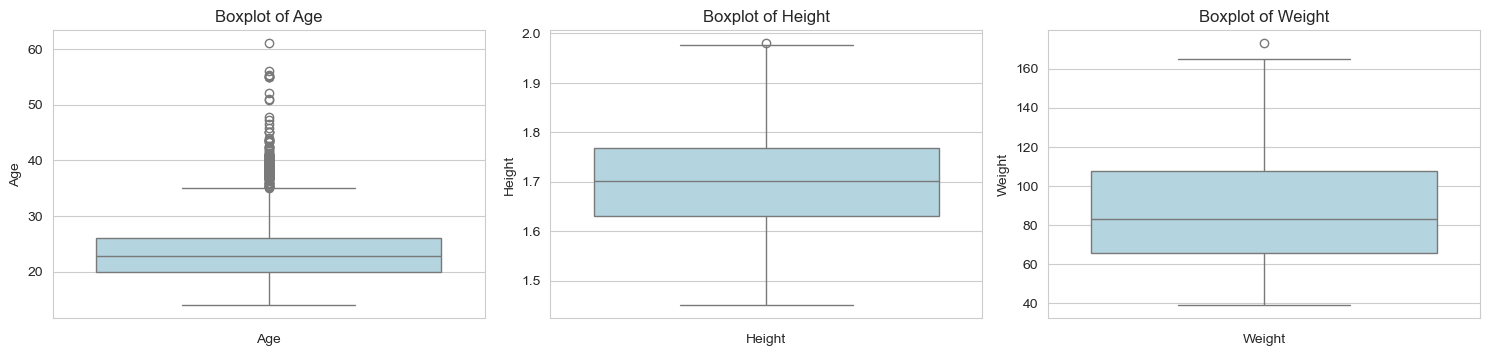

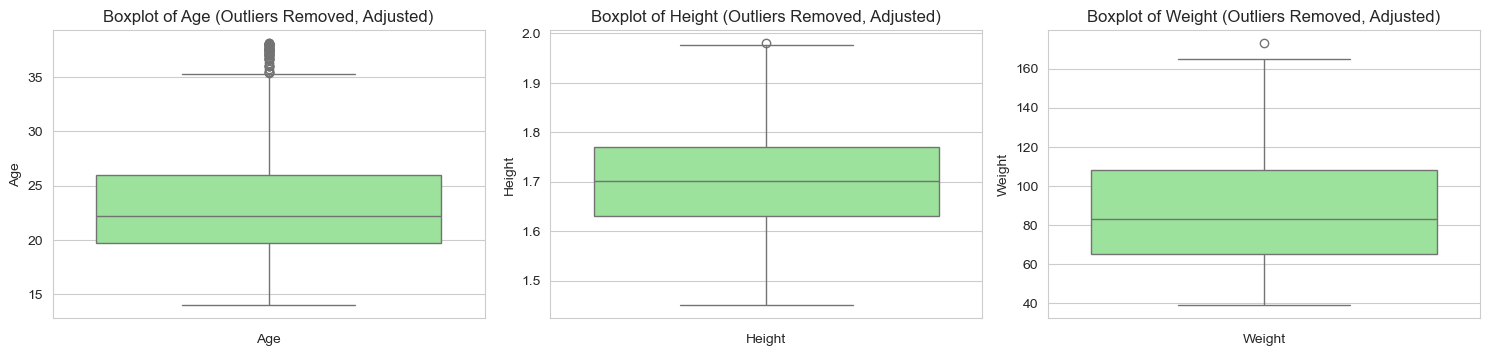

The shape is:  (2006, 16)


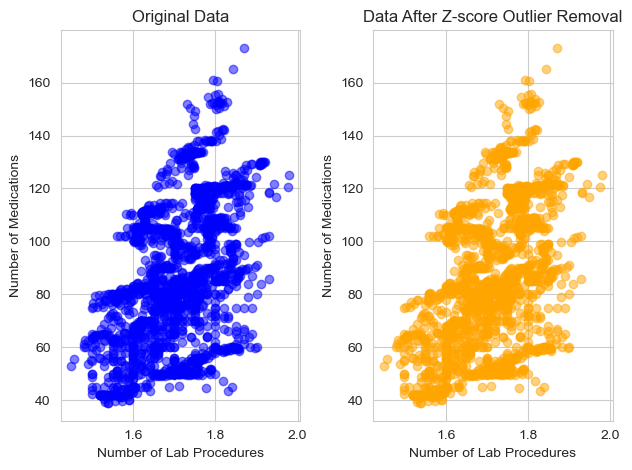

In [7]:
# 可视化原始数据与去除离群点后的数据
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# 可视化去除离群点后的数据
plt.figure(figsize=(15, 10))


for i, column in enumerate(columns_to_check):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(cleaned_data_adjusted[column], color='lightgreen')
    plt.title(f'Boxplot of {column} (Outliers Removed, Adjusted)')
    plt.xlabel(column)

plt.tight_layout()
plt.show()
print('The shape is: ',cleaned_data_adjusted.shape)


# 原始数据可视化
plt.subplot(1, 2, 1)
plt.scatter(data['Height'], data['Weight'], color='blue', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.grid(True)

# 去除离群点后的数据可视化
plt.subplot(1, 2, 2)
plt.scatter(cleaned_data_adjusted['Height'], cleaned_data_adjusted['Weight'], color='orange', alpha=0.5)
plt.title('Data After Z-score Outlier Removal')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.grid(True)
# 保持坐标轴范围一致

plt.tight_layout()
plt.show()

In [8]:
print(f"原始数据集大小: {data.shape}")
print(f"去除离群点后的数据集大小: {cleaned_data_adjusted.shape}")

cleaned_data_adjusted.head()

原始数据集大小: (2111, 16)
去除离群点后的数据集大小: (2006, 16)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [9]:
#标签编码
from sklearn.preprocessing import LabelEncoder

# 指定需要进行标签编码的列
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
# 创建标签编码器
label_encoder = LabelEncoder()

# 批量进行标签编码
for column in categorical_columns:
    if column in cleaned_data_adjusted.columns:
        # 只对存在的列进行标签编码
        cleaned_data_adjusted[column] = label_encoder.fit_transform(cleaned_data_adjusted[column])

# 获取描述性统计信息
cleaned_data_adjusted.describe()  # 包括所有数据类型

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.00000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000,2006.000000
mean,0.510967,23.387887,1.703695,86.590312,0.814058,1.881356,2.423649,2.687239,1.856929,0.01994,2.014032,0.046859,1.022410,0.683298,2.266201,2.476570
std,0.500004,4.903341,0.092885,26.616398,0.389157,0.324988,0.540353,0.779221,0.473718,0.13983,0.610477,0.211390,0.847946,0.608943,0.508211,1.179289
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.737277,1.630779,65.000000,1.000000,2.000000,2.000000,2.658689,2.000000,0.00000,1.608714,0.000000,0.144708,0.011411,2.000000,3.000000
50%,1.000000,22.233325,1.701490,83.015501,1.000000,2.000000,2.410858,3.000000,2.000000,0.00000,2.000000,0.000000,1.000000,0.670930,2.000000,3.000000
75%,1.000000,25.994658,1.770000,108.078583,1.000000,2.000000,3.000000,3.000000,2.000000,0.00000,2.480485,0.000000,1.682805,1.000000,3.000000,3.000000
max,1.000000,38.098745,1.980000,173.000000,1.000000,2.000000,3.000000,4.000000,3.000000,1.00000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


聚类

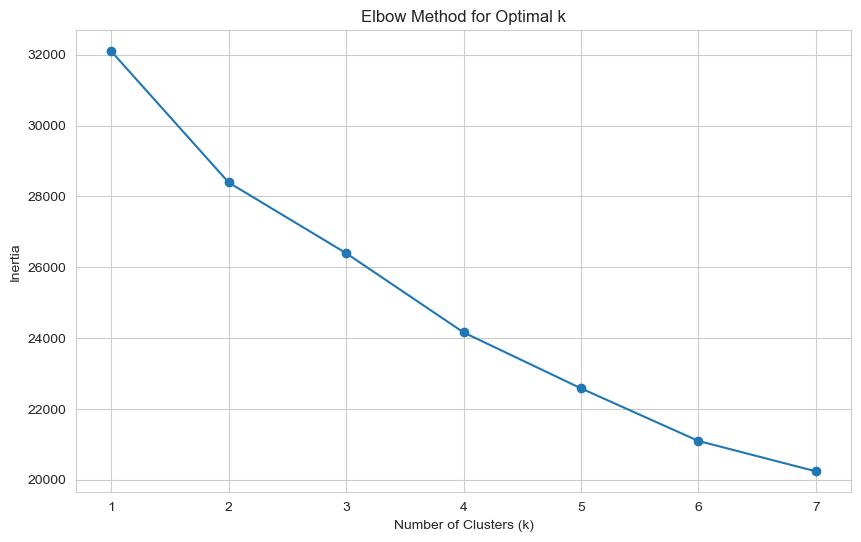

In [10]:
# 参数选择
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# 使用所有特征进行聚类
features_to_cluster = cleaned_data_adjusted.copy()

# 标准化特征
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_cluster)

inertia = []

k_range = range(1, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

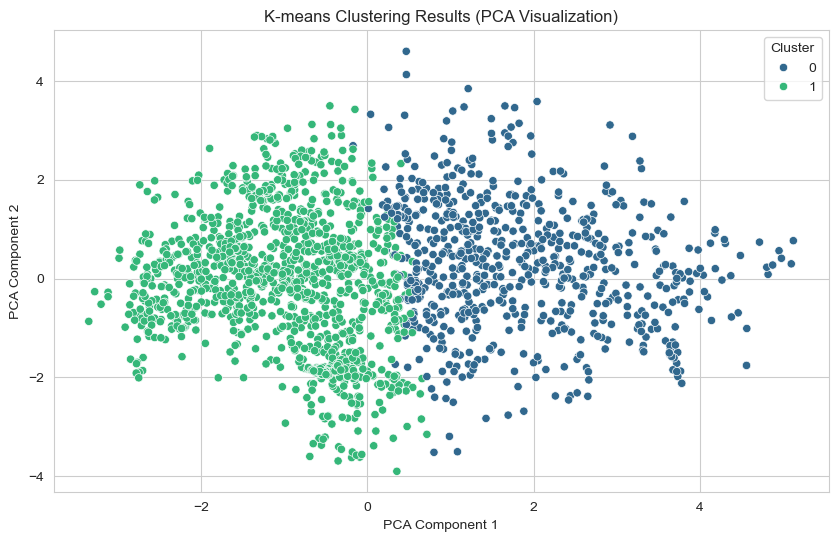

Cluster
1    1303
0     703
Name: count, dtype: int64


In [11]:
# 选择 k（假设选择 k=3），然后执行 K-means 聚类
k = 2  # 根据肘部法则选择的聚类数
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# 将聚类结果添加到 cleaned_data_adjusted 中
cleaned_data_adjusted['Cluster'] = cluster_labels

# 可视化聚类结果
plt.figure(figsize=(10, 6))
# 使用前两个主成分进行可视化
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cleaned_data_adjusted['Cluster'], palette='viridis')
plt.title('K-means Clustering Results (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 输出每个聚类的样本数
print(cleaned_data_adjusted['Cluster'].value_counts())


聚类评价

In [12]:
from sklearn.metrics import silhouette_score
#轮廓系数
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'轮廓系数: {silhouette_avg:.3f}')

轮廓系数: 0.164


In [13]:
import numpy as np

# 簇间平方和BCSS
def calculate_bcss(features, cluster_labels, cluster_centers):
    overall_mean = np.mean(features, axis=0)  
    bcss = 0
    for i in range(len(cluster_centers)):  
        cluster_points = features[cluster_labels == i]
        n_k = cluster_points.shape[0]
        bcss += n_k * np.sum((cluster_centers[i] - overall_mean) ** 2)
    return bcss

# 获取聚类的质心
cluster_centers = kmeans.cluster_centers_

# 计算BCSS
bcss = calculate_bcss(scaled_features, cluster_labels, cluster_centers)
print(f"簇间平方和（BCSS）：{bcss:.3f}")

簇间平方和（BCSS）：3700.763


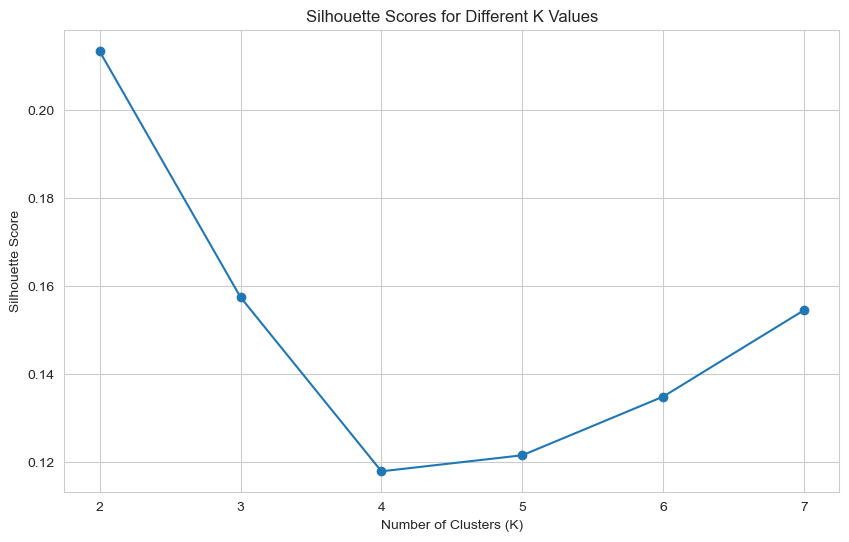

In [14]:
#轮廓系数可视化
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = cleaned_data_adjusted.copy()  

# 标准化特征
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# 选择K的范围
k_values = range(2, 8) 
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数随K值变化的图
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

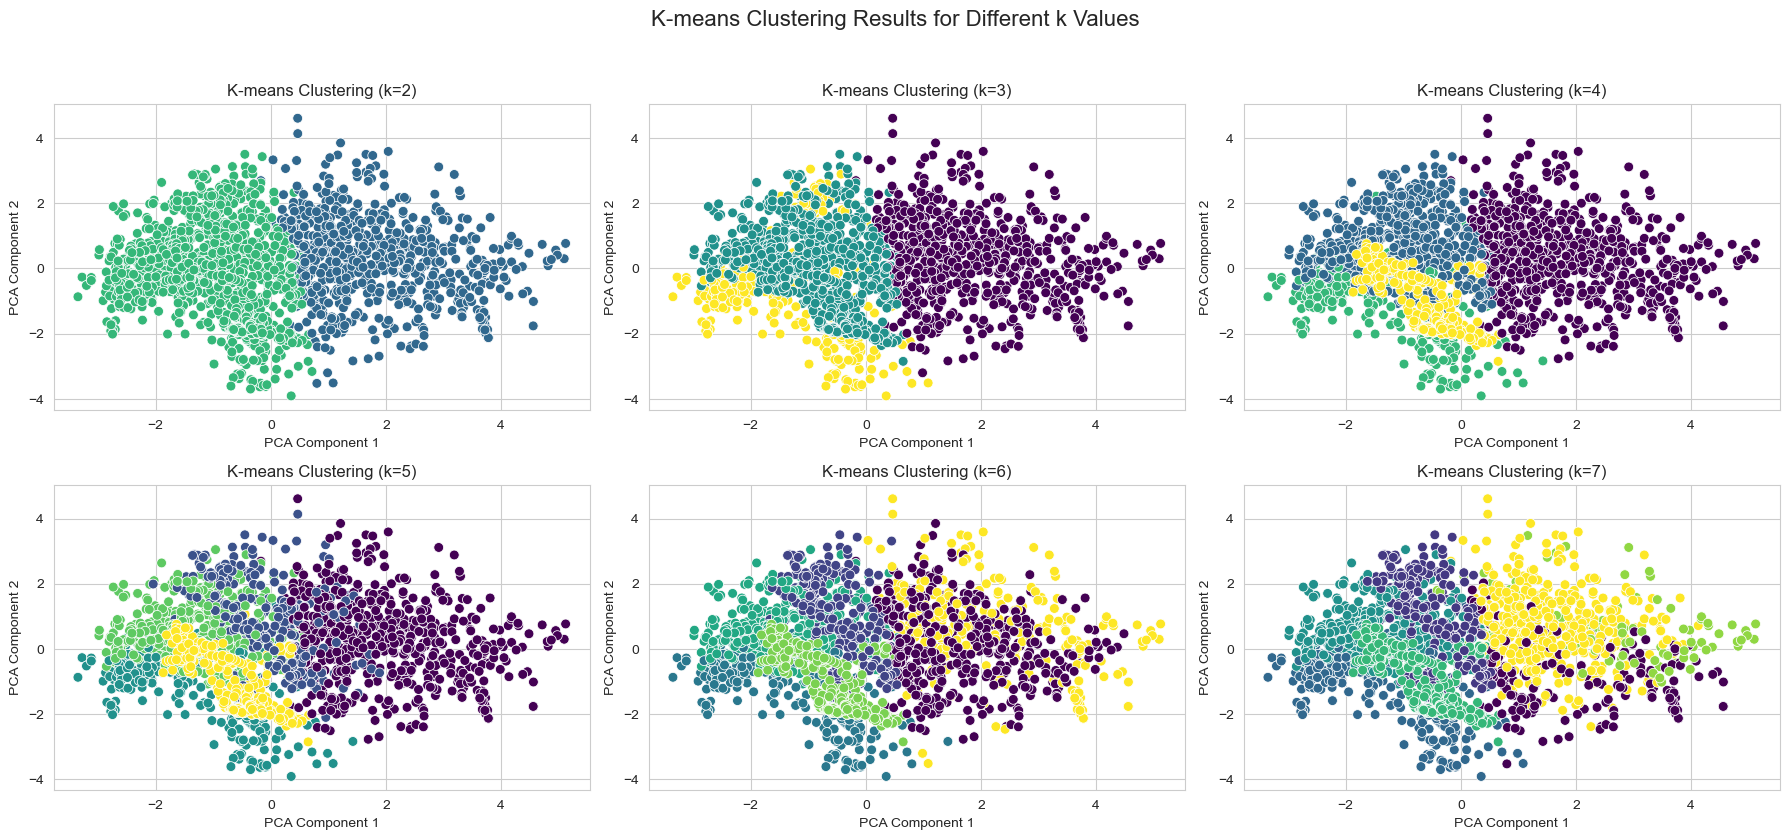

In [16]:
#不同k值的效果
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# 设定 k 值的范围
k_values = range(2, 8)

# 创建大图和子图布局
plt.figure(figsize=(18, 12))

# 遍历每个 k 值，进行 K-means 聚类并绘制子图
for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # 添加子图
    plt.subplot(3, 3, i)  # 创建 3x3 的子图布局
    sns.scatterplot(
        x=pca_result[:, 0], 
        y=pca_result[:, 1], 
        hue=cluster_labels, 
        palette='viridis', 
        s=50, 
        legend=None
    )
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)

# 显示整体大图
plt.suptitle('K-means Clustering Results for Different k Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()